In [69]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import sys
import argparse
import os
import numpy as np
from numpy.random import uniform
import pandas as pd
from itertools import product
import datetime
import glob
# %matplotlib inline
%matplotlib notebook

In [26]:
def expand_grid(dictionary):
    return pd.DataFrame([row for row in product(*dictionary.values())],
                        columns=dictionary.keys())
def readPMF(pmf_list_data, pre):
    pmf_list_data = expand_grid(pmf_list)
    all_pmf_list = []
    for index, row in pmf_list_data.iterrows():
    #     print(index)
    #     print("--")
    #     print(row)
        force = row["force"]
        temp = row["temp"]
        perturbation = row["perturbation"]
        if perturbation == 0:
            location = pre + f"/force_{force}/pmf-{temp}.dat"
            change = "none"
            upOrDown = "none"
        else:
            location = pre + f"/force_{force}/perturbation-{perturbation}-pmf-{temp}.dat"
            change = perturbation_table[perturbation].split("_")[-1]
            upOrDown = perturbation_table[perturbation].split("_")[0]
    #     print(location)
        name_list = ["f", "df", "e", "s"]
        names = ["bin", "x"] + name_list
        try:
            data = pd.read_table(location, skiprows=2, sep='\s+', names=names).assign(upOrDown=upOrDown, change=change, force=force, temp=temp, perturbation=perturbation_table[perturbation])
            all_pmf_list.append(data)
        except:
            print(row, "not available")
    return pd.concat(all_pmf_list).dropna().reset_index()

In [60]:
def expand_grid(dictionary):
    return pd.DataFrame([row for row in product(*dictionary.values())],
                        columns=dictionary.keys())
def readPMF(pre):
    perturbation_table = {0:"original", 1:"p_mem",
                          2:"m_mem", 3:"p_lipid",
                          4:"m_lipid", 5:"p_go",
                          6:"m_go", 7:"p_rg", 8:"m_rg"}
    pmf_list = {
    "perturbation":list(perturbation_table.keys()),
    "force":["0.0", "0.1", "0.2"]
    }
    pmf_list_data = expand_grid(pmf_list)
    all_pmf_list = []
    for index, row in pmf_list_data.iterrows():
    #     print(index)
    #     print("--")
    #     print(row)
        force = row["force"]
        perturbation = row["perturbation"]
        if perturbation == 0:
            location = pre + f"/force_{force}/pmf-*.dat"
            pmf_list = glob.glob(location)
            change = "none"
            upOrDown = "none"
        else:
            location = pre + f"/force_{force}/perturbation-{perturbation}-pmf-*.dat"
            pmf_list = glob.glob(location)
            change = perturbation_table[perturbation].split("_")[-1]
            upOrDown = perturbation_table[perturbation].split("_")[0]
    #     print(location)
        name_list = ["f", "df", "e", "s"]
        names = ["bin", "x"] + name_list
        for location in pmf_list:
#             print(location)
            temp = re.findall(r'pmf-(\d+)', location)
            if len(temp) != 1:
                raise ValueError('Not expected to see more than one or none')
            else:
                temp = temp[0]
            data = pd.read_table(location, skiprows=2, sep='\s+', names=names).assign(upOrDown=upOrDown, change=change, force=force, temp=temp, perturbation=perturbation_table[perturbation])
            all_pmf_list.append(data)

    return pd.concat(all_pmf_list).dropna().reset_index()

In [66]:
pre = "/Users/weilu/Research/davinci/all_freeEnergy_calculation_nov11/"
pre = pre + "next_gen_native_based_memb_3_rg_0.4_lipid_0.6_topology/1d_dis"
data = readPMF(pre)


In [74]:
import datetime

In [94]:
datetime.datetime.today().strftime("%d_%h")

'14_Nov'

In [78]:
print(datetime.date())

TypeError: Required argument 'year' (pos 1) not found

In [ ]:
# pre = "/Users/weilu/Research/davinci/all_freeEnergy_calculation/rgWidth_memb_3_rg_0.1_lipid_1_extended/1d_dis/"
pre = "/Users/weilu/Research/davinci/all_freeEnergy_calculation_nov11/next_gen_native_based_memb_3_rg_0.4_lipid_0.6_topology/1d_dis"
perturbation_table = {0:"original", 1:"p_mem", 2:"m_mem", 3:"p_lipid", 4:"m_lipid", 5:"p_go", 6:"m_go", 7:"p_rg", 8:"m_rg"}
pmf_list = {
    "temp":[*range(450, 610, 10)],
    "perturbation":list(perturbation_table.keys()),
    "force":["0.0", "0.1", "0.2"]
}
data = readPMF(pmf_list, pre)
remove_columns = ['bin']
data = data.drop(remove_columns, axis=1)
data.to_feather("/Users/weilu/Research/data/pulling/nov14_pmf.feather")

In [27]:
# pre = "/Users/weilu/Research/davinci/all_freeEnergy_calculation/rgWidth_memb_3_rg_0.1_lipid_1_extended/1d_dis/"
pre = "/Users/weilu/Research/davinci/all_freeEnergy_calculation_nov11/next_gen_native_based_memb_3_rg_0.4_lipid_0.6_topology/1d_dis"
perturbation_table = {0:"original", 1:"p_mem", 2:"m_mem", 3:"p_lipid", 4:"m_lipid", 5:"p_go", 6:"m_go", 7:"p_rg", 8:"m_rg"}
pmf_list = {
    "temp":[*range(450, 610, 10)],
    "perturbation":list(perturbation_table.keys()),
    "force":["0.0", "0.1", "0.2"]
}
data = readPMF(pmf_list, pre)
remove_columns = ['bin']
data = data.drop(remove_columns, axis=1)
data.to_feather("/Users/weilu/Research/data/pulling/nov14_pmf.feather")

temp            450
perturbation      1
force           0.0
Name: 3, dtype: object not available
temp            450
perturbation      1
force           0.1
Name: 4, dtype: object not available
temp            450
perturbation      1
force           0.2
Name: 5, dtype: object not available
temp            450
perturbation      2
force           0.0
Name: 6, dtype: object not available
temp            450
perturbation      2
force           0.1
Name: 7, dtype: object not available
temp            450
perturbation      2
force           0.2
Name: 8, dtype: object not available
temp            450
perturbation      3
force           0.0
Name: 9, dtype: object not available
temp            450
perturbation      3
force           0.1
Name: 10, dtype: object not available
temp            450
perturbation      3
force           0.2
Name: 11, dtype: object not available
temp            450
perturbation      4
force           0.0
Name: 12, dtype: object not available
temp            450
perturb

temp            500
perturbation      3
force           0.2
Name: 146, dtype: object not available
temp            500
perturbation      4
force           0.0
Name: 147, dtype: object not available
temp            500
perturbation      4
force           0.1
Name: 148, dtype: object not available
temp            500
perturbation      4
force           0.2
Name: 149, dtype: object not available
temp            500
perturbation      5
force           0.0
Name: 150, dtype: object not available
temp            500
perturbation      5
force           0.1
Name: 151, dtype: object not available
temp            500
perturbation      5
force           0.2
Name: 152, dtype: object not available
temp            500
perturbation      6
force           0.0
Name: 153, dtype: object not available
temp            500
perturbation      6
force           0.1
Name: 154, dtype: object not available
temp            500
perturbation      6
force           0.2
Name: 155, dtype: object not available
temp      

Name: 265, dtype: object not available
temp            540
perturbation      7
force           0.2
Name: 266, dtype: object not available
temp            540
perturbation      8
force           0.0
Name: 267, dtype: object not available
temp            540
perturbation      8
force           0.1
Name: 268, dtype: object not available
temp            540
perturbation      8
force           0.2
Name: 269, dtype: object not available
temp            550
perturbation      0
force           0.0
Name: 270, dtype: object not available
temp            550
perturbation      0
force           0.1
Name: 271, dtype: object not available
temp            550
perturbation      0
force           0.2
Name: 272, dtype: object not available
temp            550
perturbation      1
force           0.0
Name: 273, dtype: object not available
temp            550
perturbation      1
force           0.1
Name: 274, dtype: object not available
temp            550
perturbation      1
force           0.2
Name: 275,

Name: 387, dtype: object not available
temp            590
perturbation      3
force           0.1
Name: 388, dtype: object not available
temp            590
perturbation      3
force           0.2
Name: 389, dtype: object not available
temp            590
perturbation      4
force           0.0
Name: 390, dtype: object not available
temp            590
perturbation      4
force           0.1
Name: 391, dtype: object not available
temp            590
perturbation      4
force           0.2
Name: 392, dtype: object not available
temp            590
perturbation      5
force           0.0
Name: 393, dtype: object not available
temp            590
perturbation      5
force           0.1
Name: 394, dtype: object not available
temp            590
perturbation      5
force           0.2
Name: 395, dtype: object not available
temp            590
perturbation      6
force           0.0
Name: 396, dtype: object not available
temp            590
perturbation      6
force           0.1
Name: 397,

In [25]:
# pre = "/Users/weilu/Research/davinci/all_freeEnergy_calculation/rgWidth_memb_3_rg_0.1_lipid_1_extended/1d_dis/"
pre = "/Users/weilu/Research/davinci/all_freeEnergy_calculation_nov11/next_gen_native_based_memb_3_rg_0.4_lipid_0.6_extended/1d_qw"
perturbation_table = {0:"original", 1:"p_mem", 2:"m_mem", 3:"p_lipid", 4:"m_lipid", 5:"p_go", 6:"m_go", 7:"p_rg", 8:"m_rg"}
pmf_list = {
    "temp":[*range(450, 610, 10)],
    "perturbation":list(perturbation_table.keys()),
    "force":["0.0", "0.1", "0.2"]
}
data = readPMF(pmf_list, pre)
remove_columns = ['bin']
data = data.drop(remove_columns, axis=1)
data.to_feather("/Users/weilu/Research/data/pulling/nov12_pmf_qw.feather")

In [3]:
# pre = "/Users/weilu/Research/davinci/all_freeEnergy_calculation/rgWidth_memb_3_rg_0.1_lipid_1_extended/1d_dis/"
pre = "/Users/weilu/Research/davinci/all_freeEnergy_calculation_nov11/next_gen_native_based_memb_3_rg_0.4_lipid_0.6_extended/1d_dis"
perturbation_table = {0:"original", 1:"p_mem", 2:"m_mem", 3:"p_lipid", 4:"m_lipid", 5:"p_go", 6:"m_go", 7:"p_rg", 8:"m_rg"}
pmf_list = {
    "temp":[*range(450, 610, 10)],
    "perturbation":list(perturbation_table.keys()),
    "force":["0.0", "0.1", "0.2"]
}
data = readPMF(pmf_list, pre)
remove_columns = ['bin']
data = data.drop(remove_columns, axis=1)
data.to_feather("/Users/weilu/Research/data/pulling/nov12_pmf.feather")

temp            450
perturbation      7
force           0.0
Name: 21, dtype: object not available
temp            450
perturbation      7
force           0.1
Name: 22, dtype: object not available
temp            450
perturbation      7
force           0.2
Name: 23, dtype: object not available
temp            450
perturbation      8
force           0.0
Name: 24, dtype: object not available
temp            450
perturbation      8
force           0.1
Name: 25, dtype: object not available
temp            450
perturbation      8
force           0.2
Name: 26, dtype: object not available
temp            460
perturbation      7
force           0.0
Name: 48, dtype: object not available
temp            460
perturbation      7
force           0.1
Name: 49, dtype: object not available
temp            460
perturbation      7
force           0.2
Name: 50, dtype: object not available
temp            460
perturbation      8
force           0.0
Name: 51, dtype: object not available
temp            460


temp            570
perturbation      6
force           0.0
Name: 342, dtype: object not available
temp            570
perturbation      6
force           0.1
Name: 343, dtype: object not available
temp            570
perturbation      6
force           0.2
Name: 344, dtype: object not available
temp            570
perturbation      7
force           0.0
Name: 345, dtype: object not available
temp            570
perturbation      7
force           0.1
Name: 346, dtype: object not available
temp            570
perturbation      7
force           0.2
Name: 347, dtype: object not available
temp            570
perturbation      8
force           0.0
Name: 348, dtype: object not available
temp            570
perturbation      8
force           0.1
Name: 349, dtype: object not available
temp            570
perturbation      8
force           0.2
Name: 350, dtype: object not available
temp            580
perturbation      6
force           0.0
Name: 369, dtype: object not available
temp      

In [75]:
# pre = "/Users/weilu/Research/davinci/all_freeEnergy_calculation/rgWidth_memb_3_rg_0.1_lipid_1_extended/1d_dis/"
pre = "/Users/weilu/Research/davinci/all_freeEnergy_calculation_nov11/next_gen_native_based_memb_3_rg_0.2_lipid_0.6_extended/1d_dis"
perturbation_table = {0:"original", 1:"p_mem", 2:"m_mem", 3:"p_lipid", 4:"m_lipid", 5:"p_go", 6:"m_go", 7:"p_rg", 8:"m_rg"}
pmf_list = {
    "temp":[*range(450, 610, 10)],
    "perturbation":list(perturbation_table.keys()),
    "force":["0.0", "0.1", "0.2"]
}
data = readPMF(pmf_list, pre)


In [71]:
# pre = "/Users/weilu/Research/davinci/all_freeEnergy_calculation/rgWidth_memb_3_rg_0.1_lipid_1_extended/1d_dis/"
pre = "/Users/weilu/Research/davinci/all_freeEnergy_calculation_nov11_2/next_gen_native_based_memb_3_rg_0.2_lipid_0.6_extended/1d_dis"
perturbation_table = {0:"original", 1:"p_mem", 2:"m_mem", 3:"p_lipid", 4:"m_lipid", 5:"p_go", 6:"m_go", 7:"p_rg", 8:"m_rg"}
pmf_list = {
    "temp":[*range(450, 600, 50)],
    "perturbation":list(perturbation_table.keys()),
    "force":["0.0", "0.1", "0.2"]
}
data = readPMF(pmf_list, pre)

temp            450
perturbation      3
force           0.0
Name: 9, dtype: object not available
temp            450
perturbation      3
force           0.1
Name: 10, dtype: object not available
temp            450
perturbation      3
force           0.2
Name: 11, dtype: object not available
temp            450
perturbation      4
force           0.0
Name: 12, dtype: object not available
temp            450
perturbation      4
force           0.1
Name: 13, dtype: object not available
temp            450
perturbation      4
force           0.2
Name: 14, dtype: object not available
temp            450
perturbation      5
force           0.0
Name: 15, dtype: object not available
temp            450
perturbation      5
force           0.1
Name: 16, dtype: object not available
temp            450
perturbation      5
force           0.2
Name: 17, dtype: object not available
temp            450
perturbation      6
force           0.0
Name: 18, dtype: object not available
temp            450
p

In [72]:
remove_columns = ['bin']
data = data.drop(remove_columns, axis=1)
data.to_feather("/Users/weilu/Research/data/pulling/nov11_pmf_3.feather")

In [76]:
remove_columns = ['bin']
data = data.drop(remove_columns, axis=1)
data.to_feather("/Users/weilu/Research/data/pulling/nov11_pmf.feather")

In [55]:
def expand_grid(dictionary):
    return pd.DataFrame([row for row in product(*dictionary.values())],
                        columns=dictionary.keys())
def read_subfolder_PMF(pmf_list_data, pre):
    pmf_list_data = expand_grid(pmf_list)
    all_pmf_list = []
    for index, row in pmf_list_data.iterrows():
    #     print(index)
    #     print("--")
    #     print(row)
        subfolder = row["subfolder"]
        if subfolder.split("_")[0] == "force":
            force = float(subfolder.split("_")[1])
        else:
            force = 0.0
        temp = row["temp"]
        perturbation = row["perturbation"]
        if perturbation == 0:
            location = pre + f"/{subfolder}/pmf-{temp}.dat"
            change = "none"
            upOrDown = "none"
        else:
            location = pre + f"/{subfolder}/perturbation-{perturbation}-pmf-{temp}.dat"
            change = perturbation_table[perturbation].split("_")[-1]
            upOrDown = perturbation_table[perturbation].split("_")[0]
    #     print(location)
        name_list = ["f", "df", "e", "s"]
        names = ["bin", "x"] + name_list
        try:
            data = pd.read_table(location, skiprows=2, sep='\s+', names=names).assign(upOrDown=upOrDown, change=change, force=force, temp=temp, perturbation=perturbation_table[perturbation])
            all_pmf_list.append(data)
        except:
            print(row, "not available")
    return pd.concat(all_pmf_list).dropna().reset_index()

In [66]:
# pre = "/Users/weilu/Research/davinci/all_freeEnergy_calculation/rgWidth_memb_3_rg_0.1_lipid_1_extended/1d_dis/"
pre = "/Users/weilu/Research/davinci/all_freeEnergy_calculation_nov11/next_gen_native_based_memb_3_rg_0.2_lipid_0.6_extended/test/"
perturbation_table = {0:"original", 1:"p_mem", 2:"m_mem", 3:"p_lipid", 4:"m_lipid", 5:"p_go", 6:"m_go", 7:"p_rg", 8:"m_rg"}
pmf_list = {
    "temp":[*range(400, 630, 50)],
    "perturbation":list(perturbation_table.keys()),
    "subfolder":["force_0.0", "force_0.1", "force_0.2"]
}
data = read_subfolder_PMF(pmf_list, pre)



temp                  400
perturbation            0
subfolder       force_0.0
Name: 0, dtype: object not available
temp                  400
perturbation            0
subfolder       force_0.1
Name: 1, dtype: object not available
temp                  400
perturbation            0
subfolder       force_0.2
Name: 2, dtype: object not available
temp                  400
perturbation            1
subfolder       force_0.0
Name: 3, dtype: object not available
temp                  400
perturbation            1
subfolder       force_0.1
Name: 4, dtype: object not available
temp                  400
perturbation            1
subfolder       force_0.2
Name: 5, dtype: object not available
temp                  400
perturbation            2
subfolder       force_0.0
Name: 6, dtype: object not available
temp                  400
perturbation            2
subfolder       force_0.1
Name: 7, dtype: object not available
temp                  400
perturbation            2
subfolder       force_0.2
Na

In [67]:
remove_columns = ['bin']
data = data.drop(remove_columns, axis=1)
data.to_feather("/Users/weilu/Research/data/pulling/nov11_pmf_2.feather")


In [68]:
data

,index,x,f,df,e,s,change,force,perturbation,temp,upOrDown
0,0,7.692,6.858,0.0,-847.760,-854.617,none,0.0,original,450,none
1,1,10.927,8.500,0.0,-840.592,-849.092,none,0.0,original,450,none
2,2,14.162,0.000,0.0,-930.661,-930.661,none,0.0,original,450,none
3,3,17.397,3.953,0.0,-904.304,-908.257,none,0.0,original,450,none
4,4,20.631,2.480,0.0,-928.194,-930.674,none,0.0,original,450,none
5,5,23.866,2.678,0.0,-920.745,-923.424,none,0.0,original,450,none
6,6,27.101,2.519,0.0,-933.167,-935.685,none,0.0,original,450,none
7,7,30.336,2.731,0.0,-930.538,-933.270,none,0.0,original,450,none
8,8,33.571,2.255,0.0,-953.751,-956.006,none,0.0,original,450,none
9,9,36.806,4.218,0.0,-935.416,-939.633,none,0.0,original,450,none


In [4]:
[*range(500, 630, 10)]

[500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620]

In [31]:
perturbation_list

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [32]:
import datetime

In [43]:
perturbation_table = {0:"original", 1:"p_mem", 2:"m_mem", 3:"p_lipid", 4:"m_lipid", 5:"p_go", 6:"m_go", 7:"p_rg", 8:"m_rg"}
pmf_list = {
    "temp":[500, 530, 560, 590],
    "perturbation":list(perturbation_table.keys()),
    "force":["0.0", "0.1", "0.2"]
}

In [48]:
pmf_list_data = expand_grid(pmf_list)
pre = "/Users/weilu/Research/davinci/extended/finer"
all_pmf_list = []

for index, row in pmf_list_data.iterrows():
#     print(index)
#     print("--")
#     print(row)
    force = row["force"]
    temp = row["temp"]
    perturbation = row["perturbation"]
    if perturbation == 0:
        location = pre + f"/force_{force}/pmf-{temp}.dat"
        change = "none"
        upOrDown = "none"
    else:
        location = pre + f"/force_{force}/perturbation-{perturbation}-pmf-{temp}.dat"
        change = perturbation_table[perturbation].split("_")[-1]
        upOrDown = perturbation_table[perturbation].split("_")[0]
#     print(location)
    name_list = ["f", "df", "e", "s"]
    names = ["bin", "x"] + name_list
    data = pd.read_table(location, skiprows=2, sep='\s+', names=names).assign(upOrDown=upOrDown, change=change, force=force, temp=temp, perturbation=perturbation_table[perturbation])
    all_pmf_list.append(data)
data = pd.concat(all_pmf_list).dropna().reset_index()
data.to_feather("/Users/weilu/Research/data/pulling/nov06_pmf_2.feather")

In [53]:
def readPMF(pmf_list_data, pre):
    all_pmf_list = []
    for index, row in pmf_list_data.iterrows():
    #     print(index)
    #     print("--")
    #     print(row)
        force = row["force"]
        temp = row["temp"]
        perturbation = row["perturbation"]
        if perturbation == 0:
            location = pre + f"/force_{force}/pmf-{temp}.dat"
            change = "none"
            upOrDown = "none"
        else:
            location = pre + f"/force_{force}/perturbation-{perturbation}-pmf-{temp}.dat"
            change = perturbation_table[perturbation].split("_")[-1]
            upOrDown = perturbation_table[perturbation].split("_")[0]
    #     print(location)
        name_list = ["f", "df", "e", "s"]
        names = ["bin", "x"] + name_list
        try:
            data = pd.read_table(location, skiprows=2, sep='\s+', names=names).assign(upOrDown=upOrDown, change=change, force=force, temp=temp, perturbation=perturbation_table[perturbation])
            all_pmf_list.append(data)
        except:
            print(row, "not available")
    return pd.concat(all_pmf_list).dropna().reset_index()

In [84]:
list(range(500, 710, 10))

[500,
 510,
 520,
 530,
 540,
 550,
 560,
 570,
 580,
 590,
 600,
 610,
 620,
 630,
 640,
 650,
 660,
 670,
 680,
 690,
 700]

In [85]:
pmf_list = {
    "temp":list(range(500, 710, 10)),
    "perturbation":list(perturbation_table.keys()),
    "force":["0.0", "0.1", "0.2"]
}
pmf_list_data = expand_grid(pmf_list)
pre = "/Users/weilu/Research/davinci/extended/coarse"
data = readPMF(pmf_list_data, pre)
# data.to_feather("/Users/weilu/Research/data/pulling/nov06_pmf_3.feather")
remove_columns = ['bin']
data = data.drop(remove_columns, axis=1)
data.to_feather("/Users/weilu/Research/data/pulling/nov07_pmf_1.feather")

temp            500
perturbation      4
force           0.1
Name: 13, dtype: object not available
temp            500
perturbation      4
force           0.2
Name: 14, dtype: object not available
temp            500
perturbation      5
force           0.0
Name: 15, dtype: object not available
temp            500
perturbation      5
force           0.1
Name: 16, dtype: object not available
temp            500
perturbation      5
force           0.2
Name: 17, dtype: object not available
temp            500
perturbation      6
force           0.0
Name: 18, dtype: object not available
temp            500
perturbation      6
force           0.1
Name: 19, dtype: object not available
temp            500
perturbation      6
force           0.2
Name: 20, dtype: object not available
temp            500
perturbation      7
force           0.0
Name: 21, dtype: object not available
temp            500
perturbation      7
force           0.1
Name: 22, dtype: object not available
temp            500


temp            570
perturbation      4
force           0.0
Name: 201, dtype: object not available
temp            570
perturbation      4
force           0.1
Name: 202, dtype: object not available
temp            570
perturbation      4
force           0.2
Name: 203, dtype: object not available
temp            570
perturbation      5
force           0.0
Name: 204, dtype: object not available
temp            570
perturbation      5
force           0.1
Name: 205, dtype: object not available
temp            570
perturbation      5
force           0.2
Name: 206, dtype: object not available
temp            570
perturbation      6
force           0.0
Name: 207, dtype: object not available
temp            570
perturbation      6
force           0.1
Name: 208, dtype: object not available
temp            570
perturbation      6
force           0.2
Name: 209, dtype: object not available
temp            570
perturbation      7
force           0.0
Name: 210, dtype: object not available
temp      

temp            630
perturbation      4
force           0.0
Name: 363, dtype: object not available
temp            630
perturbation      4
force           0.1
Name: 364, dtype: object not available
temp            630
perturbation      4
force           0.2
Name: 365, dtype: object not available
temp            630
perturbation      5
force           0.0
Name: 366, dtype: object not available
temp            630
perturbation      5
force           0.1
Name: 367, dtype: object not available
temp            630
perturbation      5
force           0.2
Name: 368, dtype: object not available
temp            630
perturbation      6
force           0.0
Name: 369, dtype: object not available
temp            630
perturbation      6
force           0.1
Name: 370, dtype: object not available
temp            630
perturbation      6
force           0.2
Name: 371, dtype: object not available
temp            630
perturbation      7
force           0.0
Name: 372, dtype: object not available
temp      

temp            690
perturbation      3
force           0.1
Name: 523, dtype: object not available
temp            690
perturbation      3
force           0.2
Name: 524, dtype: object not available
temp            690
perturbation      4
force           0.0
Name: 525, dtype: object not available
temp            690
perturbation      4
force           0.1
Name: 526, dtype: object not available
temp            690
perturbation      4
force           0.2
Name: 527, dtype: object not available
temp            690
perturbation      5
force           0.0
Name: 528, dtype: object not available
temp            690
perturbation      5
force           0.1
Name: 529, dtype: object not available
temp            690
perturbation      5
force           0.2
Name: 530, dtype: object not available
temp            690
perturbation      6
force           0.0
Name: 531, dtype: object not available
temp            690
perturbation      6
force           0.1
Name: 532, dtype: object not available
temp      

In [86]:
data

,index,x,f,df,e,s,change,force,perturbation,temp,upOrDown
0,2,9.267,0.000,0.0,-763.998,-763.998,none,0.0,original,500,none
1,3,12.293,3.085,0.0,-793.759,-796.844,none,0.0,original,500,none
2,4,15.318,2.593,0.0,-765.426,-768.020,none,0.0,original,500,none
3,5,18.343,2.636,0.0,-758.124,-760.761,none,0.0,original,500,none
4,6,21.369,2.157,0.0,-755.503,-757.659,none,0.0,original,500,none
5,7,24.394,2.160,0.0,-757.645,-759.805,none,0.0,original,500,none
6,8,27.419,2.054,0.0,-758.642,-760.696,none,0.0,original,500,none
7,9,30.445,2.140,0.0,-759.274,-761.414,none,0.0,original,500,none
8,10,33.470,2.468,0.0,-760.162,-762.630,none,0.0,original,500,none
9,11,36.495,3.181,0.0,-758.039,-761.220,none,0.0,original,500,none


In [62]:
pmf_list_data = expand_grid(pmf_list)
pre = "/Users/weilu/Research/davinci/extended/finer_with_more_data"
data = readPMF(pmf_list_data, pre)
# data.to_feather("/Users/weilu/Research/data/pulling/nov06_pmf_3.feather")
remove_columns = ['bin']
data = data.drop(remove_columns, axis=1)
data.to_feather("/Users/weilu/Research/data/pulling/nov06_pmf_3.feather")

temp            500
perturbation      6
force           0.0
Name: 18, dtype: object not available
temp            500
perturbation      6
force           0.1
Name: 19, dtype: object not available
temp            500
perturbation      6
force           0.2
Name: 20, dtype: object not available
temp            500
perturbation      7
force           0.0
Name: 21, dtype: object not available
temp            500
perturbation      7
force           0.1
Name: 22, dtype: object not available
temp            500
perturbation      7
force           0.2
Name: 23, dtype: object not available
temp            500
perturbation      8
force           0.0
Name: 24, dtype: object not available
temp            500
perturbation      8
force           0.1
Name: 25, dtype: object not available
temp            500
perturbation      8
force           0.2
Name: 26, dtype: object not available
temp            530
perturbation      5
force           0.0
Name: 42, dtype: object not available
temp            530


In [24]:
temp_list = [500, 530, 560, 590]
def readPMF(force_list=["0.0", "0.1", "0.2"], temp_list=[500, 530, 560, 590],perturbation_list=[0, 1, 2, 3, 4, 5, 6, 7, 8])
    for force in force_list:
        for temp in temp_list:
            for perturbation in perturbation_list:

                # pmf 
                if perturbation == 0:
                    location = pre + f"/force_{force}/pmf-{temp}.dat"
                else:
                    location = pre + \
                    "/force_{}/perturbation-{}-pmf-{}.dat".format(force, perturbation, temp)



SyntaxError: invalid syntax (<ipython-input-24-d16f5fd7ef3a>, line 2)

In [ ]:
all_pmf_list = []
all_evpb_list = []
for folder in folder_list:
    for force in force_list:
        for temp in temp_list:
            for perturbation in perturbation_list:

                # pmf 
                if perturbation == 0:
                    location = pre + f"{folder}/1d_dis/t_all/force_{force}/pmf-{temp}.dat"
                else:
                    location = pre + \
                    "{}/1d_dis/t_all/force_{}/perturbation-{}-pmf-{}.dat".format(folder, force, perturbation, temp)

                name_list = ["f", "df", "e", "s"]
                names = ["bin", "x"] + name_list
                data = pd.read_table(location, skiprows=2, sep='\s+', names=names).assign(folder=folder, force=force, temp=temp, perturbation=perturbation_table[perturbation])
                all_pmf_list.append(data)

data = pd.concat(all_pmf_list).dropna().reset_index()
data.to_feather("/Users/weilu/Research/data/pulling/nov06_pmf.feather")

In [20]:
all_pmf_list = []
all_evpb_list = []
for folder in folder_list:
    for force in force_list:
        for temp in temp_list:
            for perturbation in perturbation_list:

                # pmf 
                if perturbation == 0:
                    location = pre + f"{folder}/1d_dis/t_all/force_{force}/pmf-{temp}.dat"
                else:
                    location = pre + \
                    "{}/1d_dis/t_all/force_{}/perturbation-{}-pmf-{}.dat".format(folder, force, perturbation, temp)

                name_list = ["f", "df", "e", "s"]
                names = ["bin", "x"] + name_list
                data = pd.read_table(location, skiprows=2, sep='\s+', names=names).assign(folder=folder, force=force, temp=temp, perturbation=perturbation_table[perturbation])
                all_pmf_list.append(data)

data = pd.concat(all_pmf_list).dropna().reset_index()
data.to_feather("/Users/weilu/Research/data/pulling/nov06_pmf.feather")

In [114]:
all_pmf_list = []
all_evpb_list = []
for folder in folder_list:
    for temp in temp_list:
        for perturbation in perturbation_list:
            
            # evpb
            if perturbation == 0:
                location = pre + "{}/1d_qw/t_all/force_0.0/evpb-{}.dat".format(folder, temp)
            else:
                location = pre + \
                "{}/1d_qw/t_all/force_0.0/perturbation-{}-evpb-{}.dat".format(folder, perturbation, temp)

            name_list = ["Lipid", "Go", "Mem", "Rg"]
            names = ["bin", "q"] + name_list
            data = pd.read_table(location, skiprows=1, sep='\s+', names=names).assign(folder=folder, temp=temp, perturbation=perturbation_table[perturbation])
            all_evpb_list.append(data)
            
            # pmf 
            if perturbation == 0:
                location = pre + "{}/1d_qw/t_all/force_0.0/pmf-{}.dat".format(folder, temp)
            else:
                location = pre + \
                "{}/1d_qw/t_all/force_0.0/perturbation-{}-pmf-{}.dat".format(folder, perturbation, temp)

            name_list = ["f", "df", "e", "s"]
            names = ["bin", "q"] + name_list
            data = pd.read_table(location, skiprows=2, sep='\s+', names=names).assign(folder=folder, temp=temp, perturbation=perturbation_table[perturbation])
            all_pmf_list.append(data)

data = pd.concat(all_pmf_list).dropna().reset_index()
data.to_feather("/Users/weilu/Research/data/pulling/oct31_pmf_qw.feather")

data = pd.concat(all_evpb_list).dropna().reset_index()
data.to_feather("/Users/weilu/Research/data/pulling/oct31_evpb_qw.feather")

In [77]:
pre = "/Users/weilu/Research/server/oct_2017/23oct/"
folder_list = [
   'memb_3_rg_0.1_lipid_1_extended',
    'memb_3_rg_0.1_lipid_1_topology'
]
all_data_list = []
temp_list = [450, 500, 550]
perturbation_list = [0, 1, 2, 3, 4]
for folder in folder_list:
    for temp in temp_list:
        for perturbation in perturbation_list:
            if perturbation == 0:
                location = pre + "{}/1d_dis/t_all/force_0.0/pmf-{}.dat".format(folder, temp)
            else:
                location = pre + \
                "{}/1d_dis/t_all/force_0.0/perturbation-{}-pmf-{}.dat".format(folder, perturbation, temp)
#         location = pre + "{}/1d_dis/t_all/force_0.0/pmf-{}.dat".format(folder, temp)
            name_list = ["f", "df", "e", "s"]
            names = ["bin", "x"] + name_list
            data = pd.read_table(location, skiprows=2, sep='\s+', names=names).assign(folder=folder, temp=temp, perturbation=perturbation)
            all_data_list.append(data)
data = pd.concat(all_data_list)
data = data.dropna().reset_index()
data.to_feather("/Users/weilu/Research/data/pulling/oct31_pmf.feather")

<IPython.core.display.Javascript object>


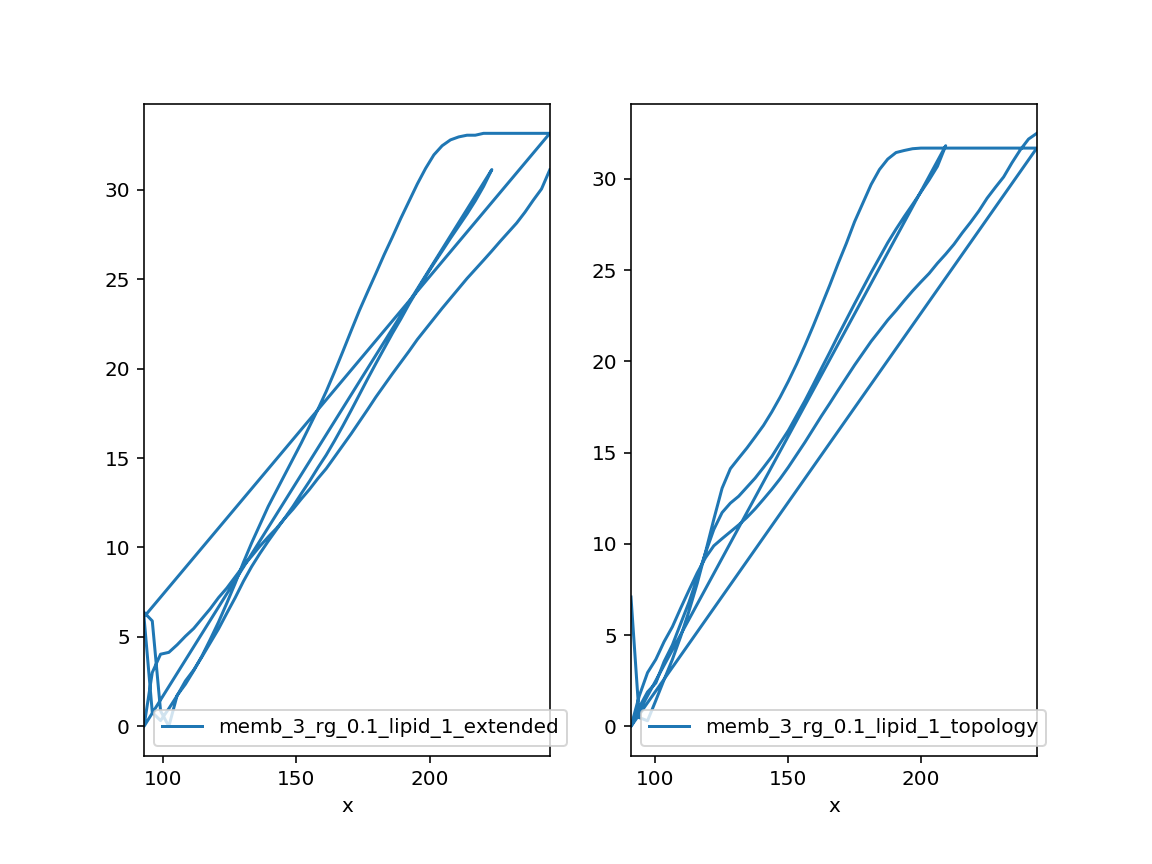

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(8,6))
i = 0
for label, group in data.groupby('folder'):
#     processed_data = group - group.mean()
#     processed_data["x"] = data["x"]
    
    group.plot('x', "f", ax=axes[i], label=label)
    i = i + 1

In [86]:
pre = "/Users/weilu/Research/server/oct_2017/23oct/"
folder_list = [
   'memb_3_rg_0.1_lipid_1_extended',
    'memb_3_rg_0.1_lipid_1_topology'
]
all_data_list = []
for folder in folder_list:
    location = pre + "{}/1d_qw/t_all/force_0.0/evpb-500.dat".format(folder)
    name_list = ["Lipid", "Go", "Mem", "Rg"]
    names = ["bin", "x"] + name_list
    data = pd.read_table(location, skiprows=1, sep='\s+', names=names).assign(folder=folder)
    all_data_list.append(data)
data = pd.concat(all_data_list)
data = data.dropna()

<IPython.core.display.Javascript object>


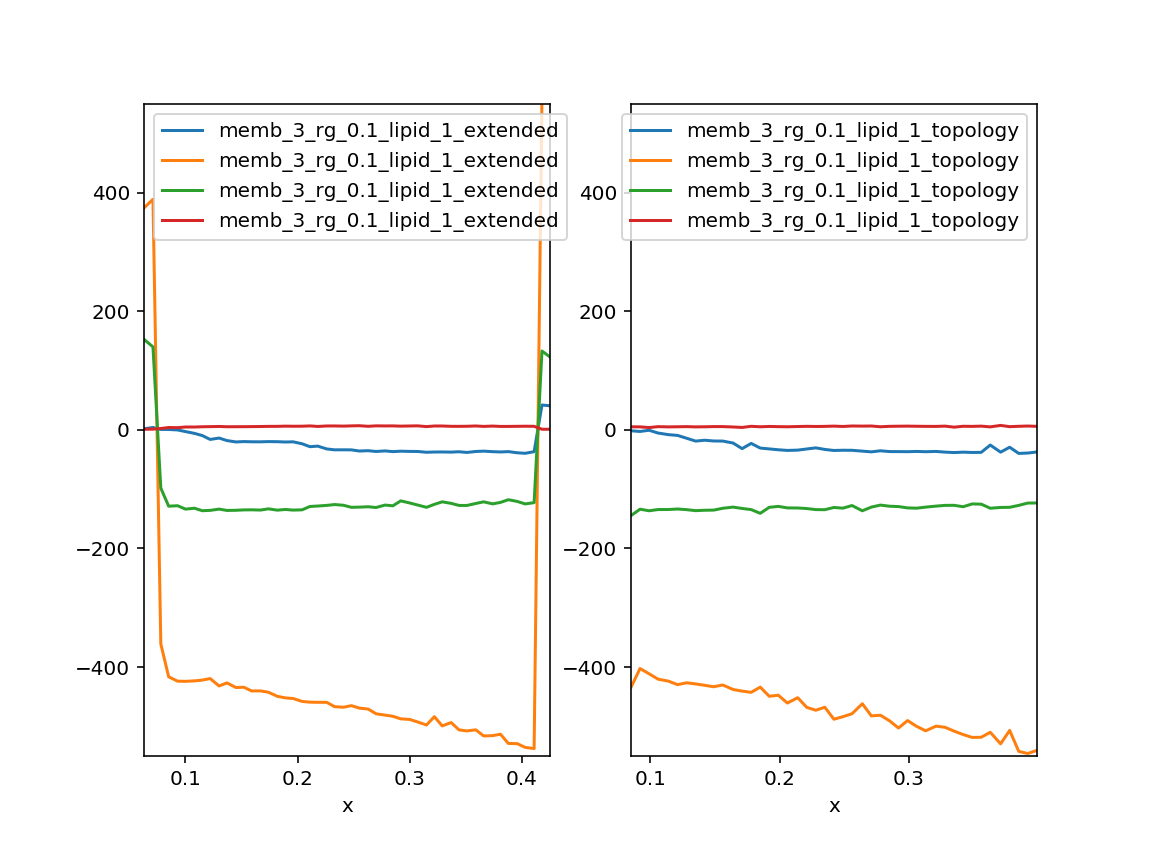

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(8,6))
i = 0
for label, group in data.groupby('folder'):
#     processed_data = group - group.mean()
#     processed_data["x"] = data["x"]
    for name in name_list:
        group.plot('x', name, ax=axes[i], ylim=(-550,550), label=label)
    i = i + 1


In [ ]:
plotcontour.py pmf-400.dat -xmax 1 -xmin 0 -ymin 0 -ymax 150"

In [63]:
location = "/Users/weilu/Research/davinci/extended/2d_qw_dis/t_all/force_0.0/"
filename = location + "pmf-500.dat"
x = 1
y = 2
z = 3
xmin, xmax = 0, 1
ymin, ymax = 0, 150
zmin, zmax = 0, 30
xlabel, ylabel = "xlabel", "ylabel"
title = "title"
titlefontsize = 28



In [98]:
location = "/Users/weilu/Research/server/oct_2017/23oct/memb_3_rg_0.1_lipid_1_topology/2d_qw_dis/t_all/force_0.0/"
filename = location + "pmf-500.dat"
x = 1
y = 2
z = 3
xmin, xmax = 0, 1
ymin, ymax = 0, 150
zmin, zmax = 0, 30
xlabel, ylabel = "xlabel", "ylabel"
title = "title"
titlefontsize = 28


In [99]:
location = "/Users/weilu/Research/server/oct_2017/23oct/memb_3_rg_0.1_lipid_1_topology/2d_qw_dis/t_all/force_0.0/"
arguments ={
    filename : location + "pmf-500.dat",
    x : 1,
    y : 2,
    z : 3,
    xmin, xmax : 0, 1,
    ymin, ymax : 0, 150,
    zmin, zmax : 0, 30,
    xlabel, ylabel : "xlabel", "ylabel",
    title : "title",
    titlefontsize : 28
}

SyntaxError: invalid syntax (<ipython-input-99-0e619d8b795c>, line 7)

In [64]:
def plot2d(**kargs):
    data = np.loadtxt(filename)
    data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
    data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
    data = data[~(data[:,z] < zmin)]

    xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
    yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
    zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
    # plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
    jet = cm = plt.get_cmap('jet')
    print(jet)
    # plt.contourf(xi, yi, zi, 20, cmap='rainbow')
    plt.contourf(xi, yi, zi, 30, cmap='jet')
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.clim(zmin, zmax)
    plt.colorbar()

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title, y=1.02, fontsize = titlefontsize)
    #plt.tight_layout()
    #plt.axis('equal')
    #plt.axes().set_aspect('equal')
    #plt.axes().set_aspect('scaled')
    # plt.savefig(args.outname, dpi=args.dpi, bbox_inches='tight')
    plt.show()

In [65]:
location = "/Users/weilu/Research/server/oct_2017/23oct/memb_3_rg_0.1_lipid_1_topology/2d_qw_dis/t_all/force_0.0/"
filename = location + "pmf-550.dat"
data = np.loadtxt(filename)
data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
data = data[~(data[:,z] < zmin)]

xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
# plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
jet = cm = plt.get_cmap('jet')
print(jet)
# plt.contourf(xi, yi, zi, 20, cmap='rainbow')
plt.figure()
plt.contourf(xi, yi, zi, 30, cmap='jet')
plt.xlim(xmin, xmax)
plt.clim(zmin, zmax)
plt.colorbar()

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title, y=1.02, fontsize = titlefontsize)
#plt.tight_layout()
#plt.axis('equal')
#plt.axes().set_aspect('equal')
#plt.axes().set_aspect('scaled')
# plt.savefig(args.outname, dpi=args.dpi, bbox_inches='tight')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/weilu/Research/server/oct_2017/23oct/memb_3_rg_0.1_lipid_1_topology/2d_qw_dis/t_all/force_0.0/pmf-550.dat'

In [ ]:
plot2d()

<IPython.core.display.Javascript object>


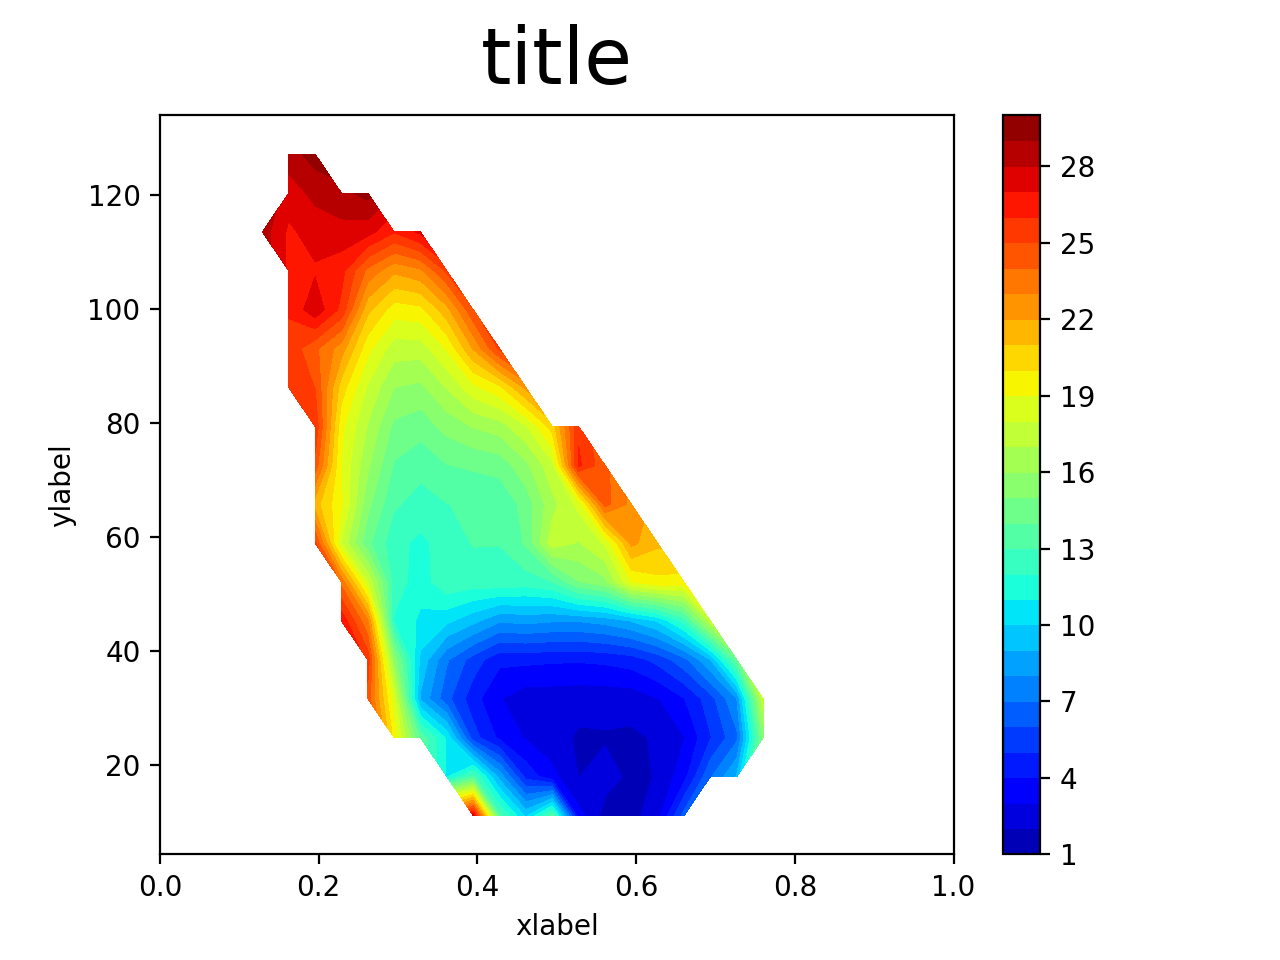

In [98]:
location = "/Users/weilu/Research/davinci/all_freeEnergy_calculation_nov11/next_gen_native_based_memb_3_rg_0.4_lipid_0.6_topology/2d_qw_dis/force_0.0/"
filename = location + "pmf-490.dat"
x = 1
y = 2
z = 3
xmin, xmax = 0, 1
ymin, ymax = 0, 150
zmin, zmax = 0, 30
xlabel, ylabel = "xlabel", "ylabel"
title = "title"
titlefontsize = 28

data = np.loadtxt(filename)
data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
data = data[~(data[:,z] < zmin)]

xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
# plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
jet = cm = plt.get_cmap('jet')
print(jet)
# plt.contourf(xi, yi, zi, 20, cmap='rainbow')
plt.figure()
plt.contourf(xi, yi, zi, 30, cmap='jet')
plt.xlim(xmin, xmax)
plt.clim(zmin, zmax)
plt.colorbar()

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title, y=1.02, fontsize = titlefontsize)
#plt.tight_layout()
#plt.axis('equal')
#plt.axes().set_aspect('equal')
#plt.axes().set_aspect('scaled')
# plt.savefig(args.outname, dpi=args.dpi, bbox_inches='tight')
plt.show()

<IPython.core.display.Javascript object>


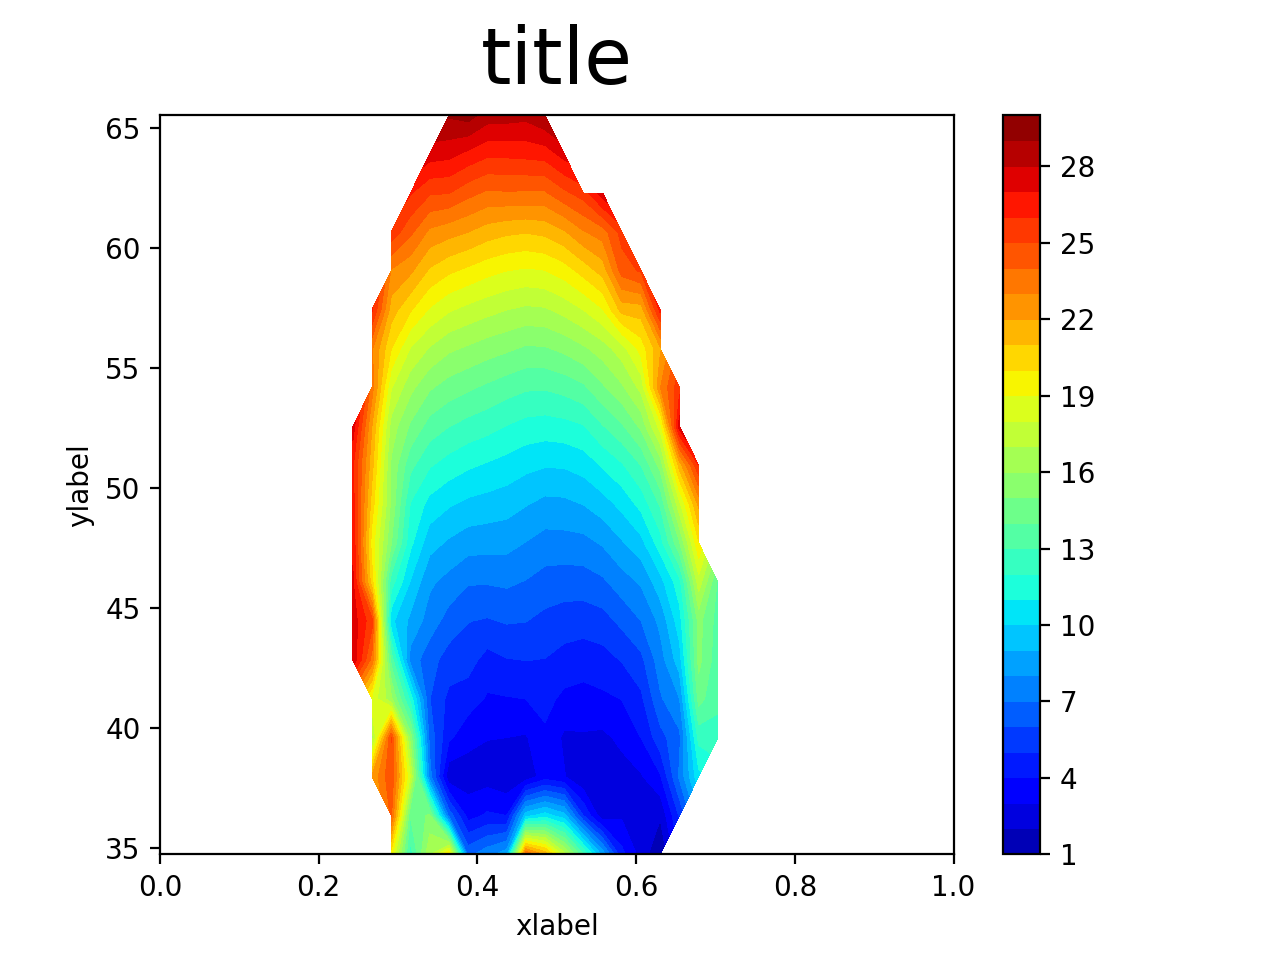

In [96]:
location = "/Users/weilu/Research/davinci/nov_14_all_freeEnergy_calculation/stronger_bias_for_expand_distance_rgWidth_memb_3_rg_0.1_lipid_1_extended/2d_qw_dis/force_0.0/"
filename = location + "pmf-500.dat"
x = 1
y = 2
z = 3
xmin, xmax = 0, 1
ymin, ymax = 0, 150
zmin, zmax = 0, 30
xlabel, ylabel = "xlabel", "ylabel"
title = "title"
titlefontsize = 28

data = np.loadtxt(filename)
data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
data = data[~(data[:,z] < zmin)]

xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
# plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
jet = cm = plt.get_cmap('jet')
print(jet)
# plt.contourf(xi, yi, zi, 20, cmap='rainbow')
plt.figure()
plt.contourf(xi, yi, zi, 30, cmap='jet')
plt.xlim(xmin, xmax)
plt.clim(zmin, zmax)
plt.colorbar()

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title, y=1.02, fontsize = titlefontsize)
#plt.tight_layout()
#plt.axis('equal')
#plt.axes().set_aspect('equal')
#plt.axes().set_aspect('scaled')
# plt.savefig(args.outname, dpi=args.dpi, bbox_inches='tight')
plt.show()

<IPython.core.display.Javascript object>


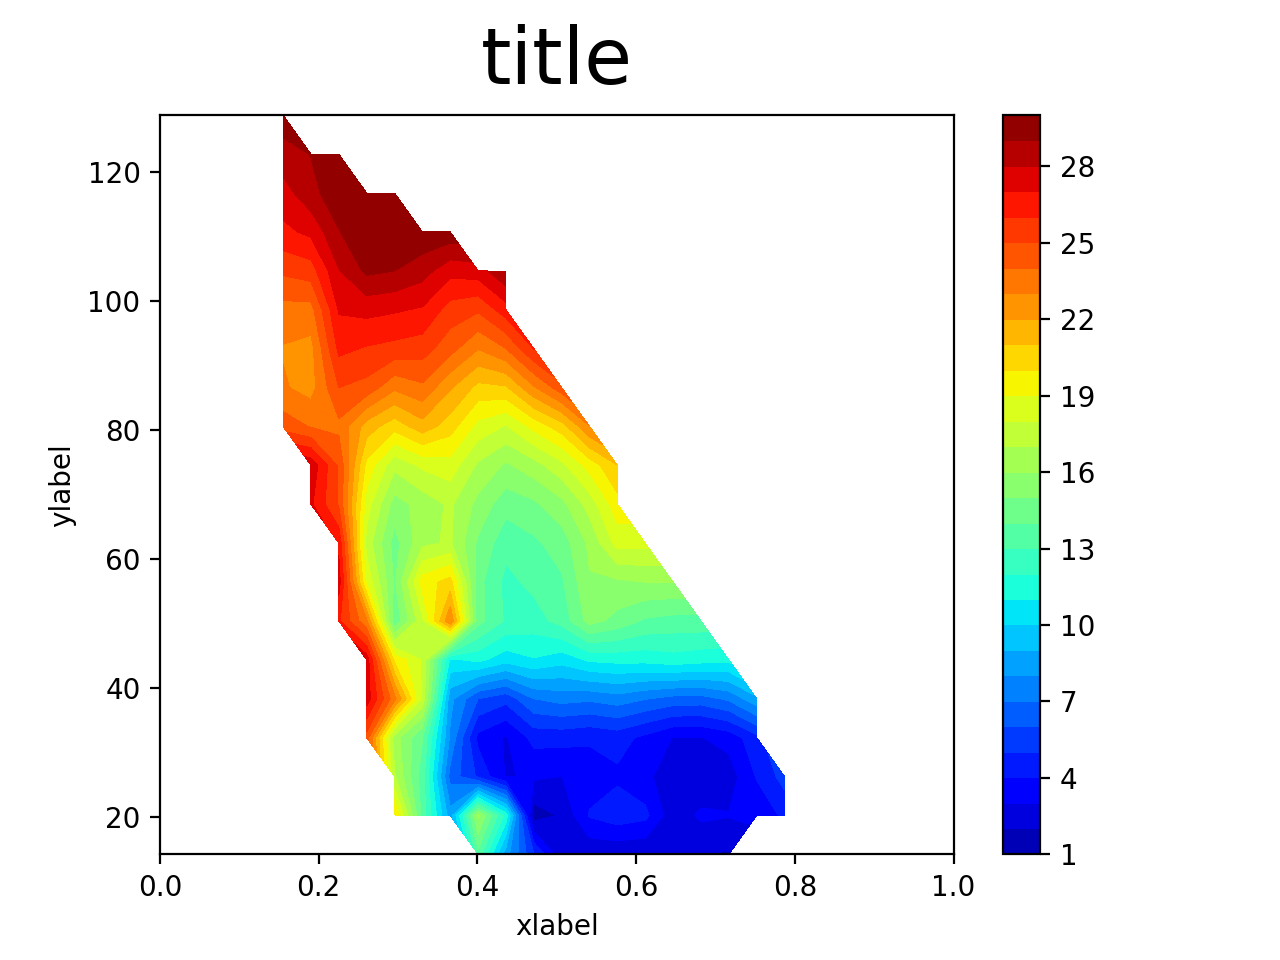

In [24]:
location = "/Users/weilu/Research/davinci/all_freeEnergy_calculation_nov11/next_gen_native_based_memb_3_rg_0.4_lipid_0.6_extended/low_t_2d_qw_dis/force_0.0/"
filename = location + "pmf-350.dat"
x = 1
y = 2
z = 3
xmin, xmax = 0, 1
ymin, ymax = 0, 150
zmin, zmax = 0, 30
xlabel, ylabel = "xlabel", "ylabel"
title = "title"
titlefontsize = 28

data = np.loadtxt(filename)
data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
data = data[~(data[:,z] < zmin)]

xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
# plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
jet = cm = plt.get_cmap('jet')
print(jet)
# plt.contourf(xi, yi, zi, 20, cmap='rainbow')
plt.figure()
plt.contourf(xi, yi, zi, 30, cmap='jet')
plt.xlim(xmin, xmax)
plt.clim(zmin, zmax)
plt.colorbar()

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title, y=1.02, fontsize = titlefontsize)
#plt.tight_layout()
#plt.axis('equal')
#plt.axes().set_aspect('equal')
#plt.axes().set_aspect('scaled')
# plt.savefig(args.outname, dpi=args.dpi, bbox_inches='tight')
plt.show()

<IPython.core.display.Javascript object>


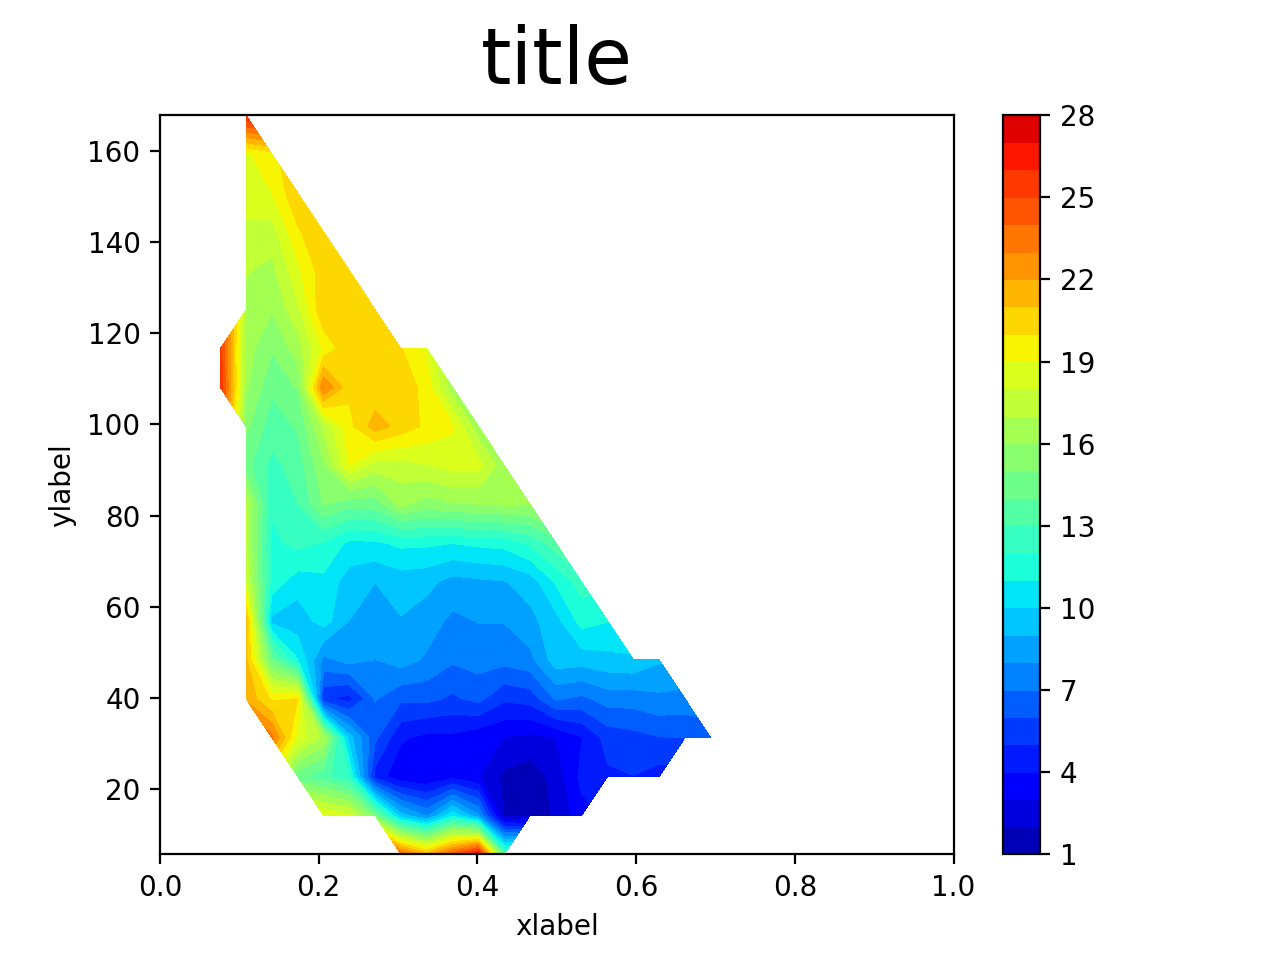

In [23]:
location = "/Users/weilu/Research/davinci/all_freeEnergy_calculation_nov11/next_gen_native_based_memb_3_rg_0.4_lipid_0.6_extended/2d_qw_dis/force_0.0/"
filename = location + "pmf-450.dat"
x = 1
y = 2
z = 3
xmin, xmax = 0, 1
ymin, ymax = 0, 150
zmin, zmax = 0, 30
xlabel, ylabel = "xlabel", "ylabel"
title = "title"
titlefontsize = 28

data = np.loadtxt(filename)
data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
data = data[~(data[:,z] < zmin)]

xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
# plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
jet = cm = plt.get_cmap('jet')
print(jet)
# plt.contourf(xi, yi, zi, 20, cmap='rainbow')
plt.figure()
plt.contourf(xi, yi, zi, 30, cmap='jet')
plt.xlim(xmin, xmax)
plt.clim(zmin, zmax)
plt.colorbar()

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title, y=1.02, fontsize = titlefontsize)
#plt.tight_layout()
#plt.axis('equal')
#plt.axes().set_aspect('equal')
#plt.axes().set_aspect('scaled')
# plt.savefig(args.outname, dpi=args.dpi, bbox_inches='tight')
plt.show()

<IPython.core.display.Javascript object>


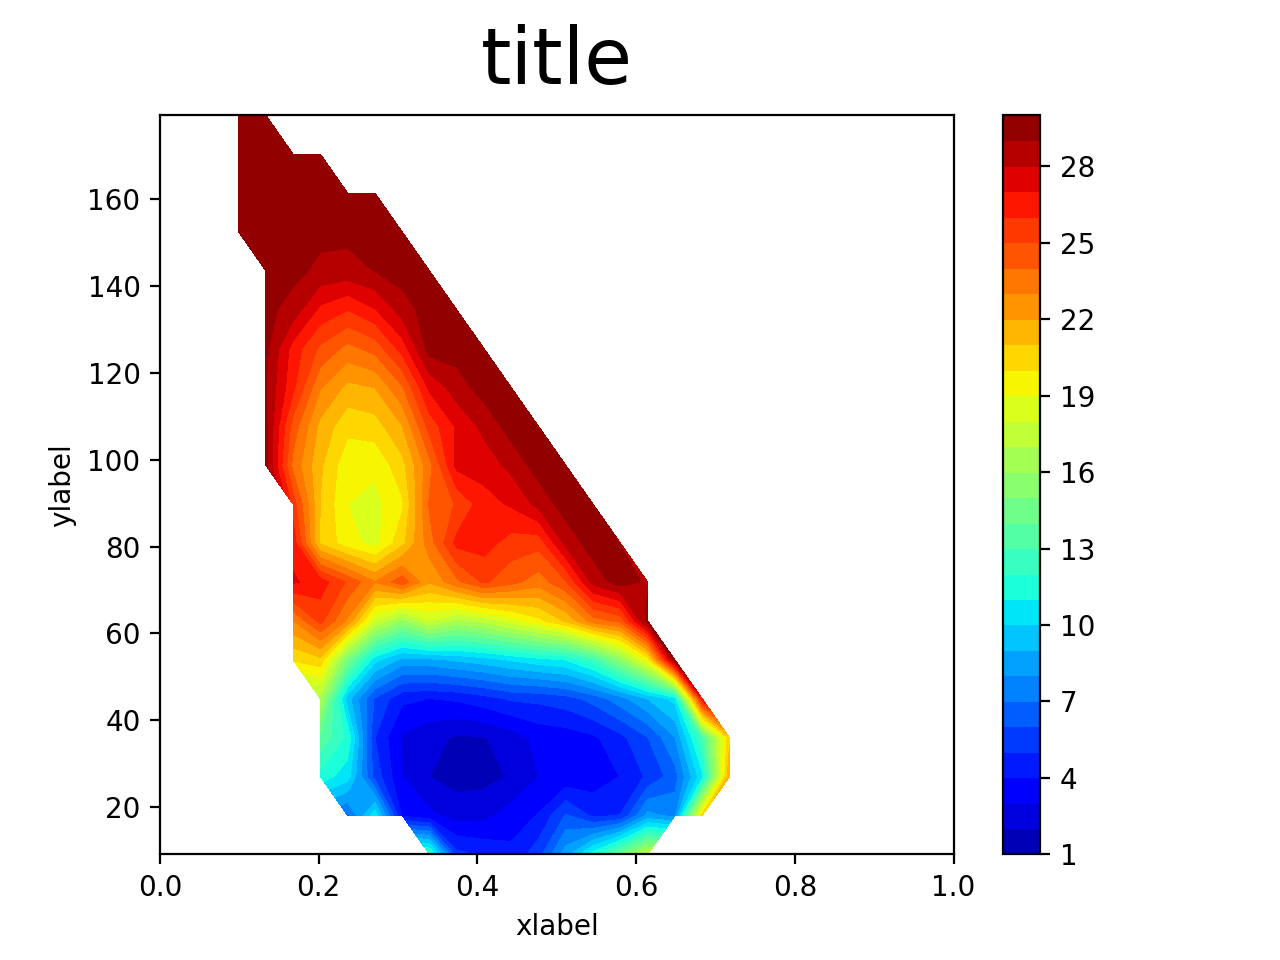

In [74]:
location = "/Users/weilu/Research/davinci/extended/2d_qw_dis/t_all/force_0.1/"
filename = location + "pmf-550.dat"
x = 1
y = 2
z = 3
xmin, xmax = 0, 1
ymin, ymax = 0, 150
zmin, zmax = 0, 30
xlabel, ylabel = "xlabel", "ylabel"
title = "title"
titlefontsize = 28

data = np.loadtxt(filename)
data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
data = data[~(data[:,z] < zmin)]

xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
# plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
jet = cm = plt.get_cmap('jet')
print(jet)
# plt.contourf(xi, yi, zi, 20, cmap='rainbow')
plt.figure()
plt.contourf(xi, yi, zi, 30, cmap='jet')
plt.xlim(xmin, xmax)
plt.clim(zmin, zmax)
plt.colorbar()

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title, y=1.02, fontsize = titlefontsize)
#plt.tight_layout()
#plt.axis('equal')
#plt.axes().set_aspect('equal')
#plt.axes().set_aspect('scaled')
# plt.savefig(args.outname, dpi=args.dpi, bbox_inches='tight')
plt.show()

<IPython.core.display.Javascript object>


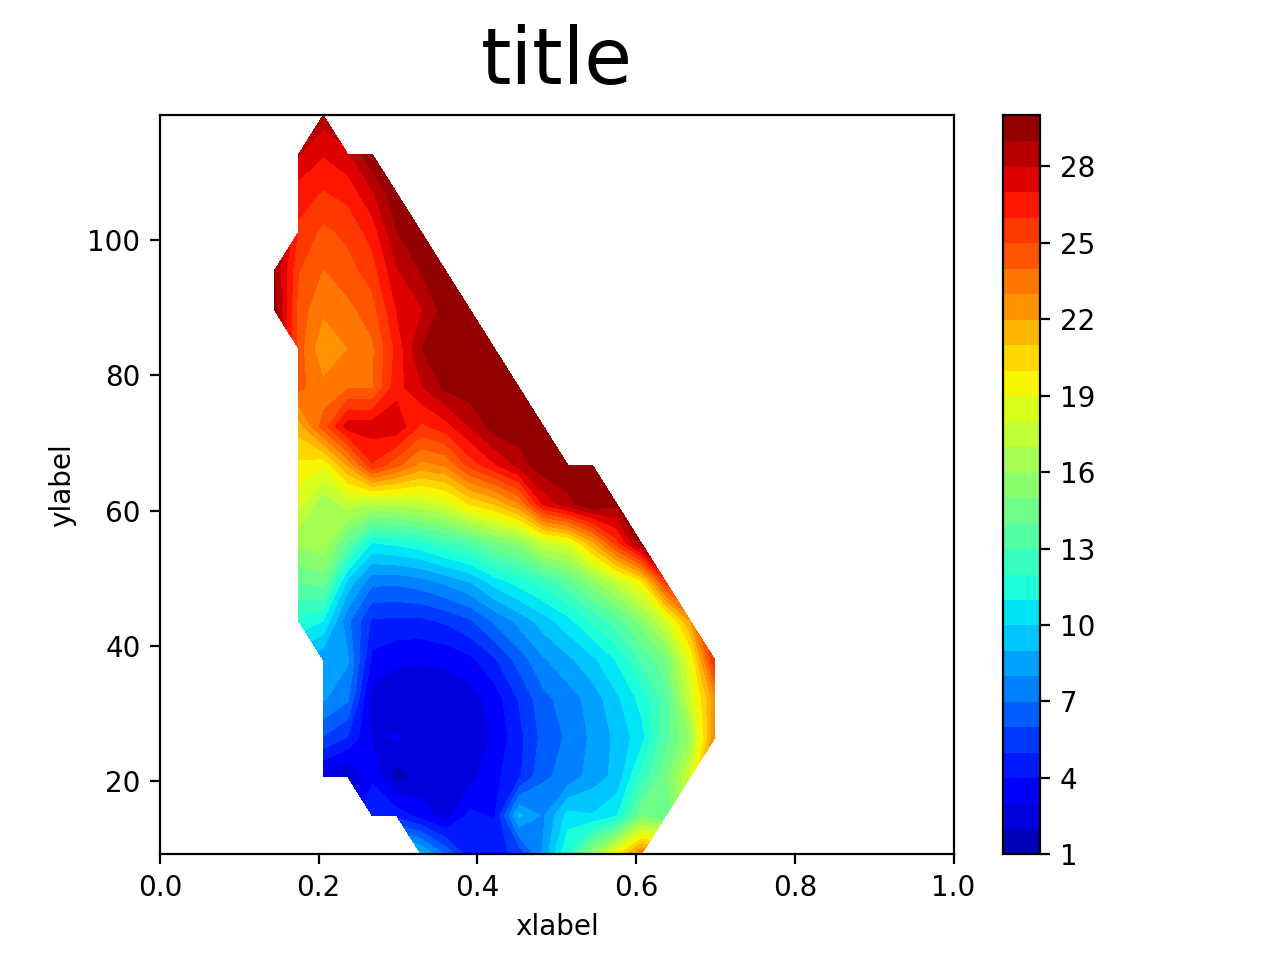

In [79]:
location = "/Users/weilu/Research/davinci/extended/2d_qw_dis/t_all/force_0.0/"
filename = location + "perturbation-6-pmf-550.dat"
x = 1
y = 2
z = 3
xmin, xmax = 0, 1
ymin, ymax = 0, 150
zmin, zmax = 0, 30
xlabel, ylabel = "xlabel", "ylabel"
title = "title"
titlefontsize = 28

data = np.loadtxt(filename)
data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
data = data[~(data[:,z] < zmin)]

xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
# plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
jet = cm = plt.get_cmap('jet')
print(jet)
# plt.contourf(xi, yi, zi, 20, cmap='rainbow')
plt.figure()
plt.contourf(xi, yi, zi, 30, cmap='jet')
plt.xlim(xmin, xmax)
plt.clim(zmin, zmax)
plt.colorbar()

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title, y=1.02, fontsize = titlefontsize)
#plt.tight_layout()
#plt.axis('equal')
#plt.axes().set_aspect('equal')
#plt.axes().set_aspect('scaled')
# plt.savefig(args.outname, dpi=args.dpi, bbox_inches='tight')
plt.show()

<IPython.core.display.Javascript object>


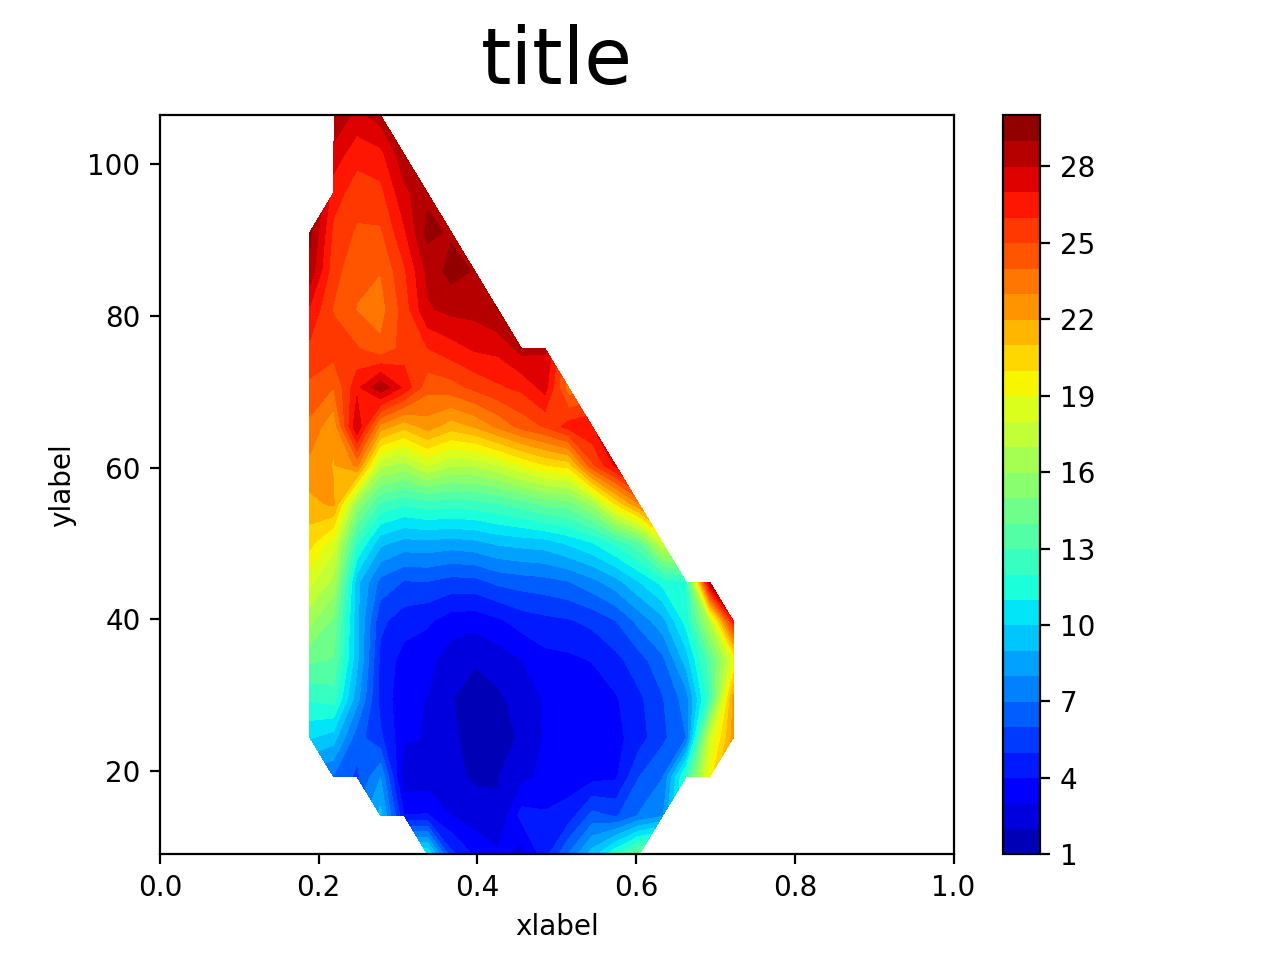

In [80]:
location = "/Users/weilu/Research/davinci/extended/2d_qw_dis/t_all/force_0.0/"
filename = location + "pmf-550.dat"
x = 1
y = 2
z = 3
xmin, xmax = 0, 1
ymin, ymax = 0, 150
zmin, zmax = 0, 30
xlabel, ylabel = "xlabel", "ylabel"
title = "title"
titlefontsize = 28

data = np.loadtxt(filename)
data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
data = data[~(data[:,z] < zmin)]

xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
# plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
jet = cm = plt.get_cmap('jet')
print(jet)
# plt.contourf(xi, yi, zi, 20, cmap='rainbow')
plt.figure()
plt.contourf(xi, yi, zi, 30, cmap='jet')
plt.xlim(xmin, xmax)
plt.clim(zmin, zmax)
plt.colorbar()

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title, y=1.02, fontsize = titlefontsize)
#plt.tight_layout()
#plt.axis('equal')
#plt.axes().set_aspect('equal')
#plt.axes().set_aspect('scaled')
# plt.savefig(args.outname, dpi=args.dpi, bbox_inches='tight')
plt.show()

In [14]:
%matplotlib notebook

In [28]:
location = "/Users/weilu/Research/server/oct_2017/23oct/memb_3_rg_0.1_lipid_1_extended/2d_qw_dis/t_all/force_0.0/"
filename = location + "pmf-500.dat"
data = np.loadtxt(filename)
data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
data = data[~(data[:,z] < zmin)]

xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
# plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
jet = cm = plt.get_cmap('jet')
print(jet)
# plt.contourf(xi, yi, zi, 20, cmap='rainbow')
plt.contourf(xi, yi, zi, 30, cmap='jet')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.clim(zmin, zmax)
plt.colorbar()

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title, y=1.02, fontsize = titlefontsize)
#plt.tight_layout()
#plt.axis('equal')
#plt.axes().set_aspect('equal')
#plt.axes().set_aspect('scaled')
# plt.savefig(args.outname, dpi=args.dpi, bbox_inches='tight')
plt.show()

In [ ]:
location = "/Users/weilu/Research/server/oct_2017/23oct/memb_3_rg_0.1_lipid_1_extended/1d_dis/t_all/force_0.0"
file